In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2, ifft2
from scipy import ndimage
import imageio.v3 as iio

In [7]:


# Read the images and convert to grayscale
MV01 = iio.imread("Pic1.png", pilmode='L')
MV02 = iio.imread("Pic2.png", pilmode='L')


# Compute the 2D Fourier Transform and shift the zero frequency component to the center
FMV01 = fftshift(fft2(MV01))
FMV02 = fftshift(fft2(MV02))

# Get the phase and amplitude of the Fourier Transforms
FMV01_phase = np.angle(FMV01)
FMV01_amp = np.abs(FMV01)
FMV02_phase = np.angle(FMV02)
FMV02_amp = np.abs(FMV02)


In [11]:
img1 = MV01
img2 = MV02

# Fourier Transform of the images
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20 * np.log(np.abs(fshift1))

f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20 * np.log(np.abs(fshift2))


In [13]:
# Crop the FMV02_phase array to match the dimensions of FMV01_amp
FMV02_phase_cropped = FMV02_phase[:FMV01_amp.shape[0], :FMV01_amp.shape[1]]

# Combine the amplitude of one image with the phase of the other
FMV01_exp_FMV02 = FMV01_amp * np.exp(1j * FMV02_phase_cropped)
FMV02_exp_FMV01 = FMV02_amp * np.exp(1j * FMV01_phase)


# Inverse Fourier Transform to get the combined images
FMV01_exp_FMV02_pic = np.abs(ifft2(FMV01_exp_FMV02))
FMV02_exp_FMV01_pic = np.abs(ifft2(FMV02_exp_FMV01))


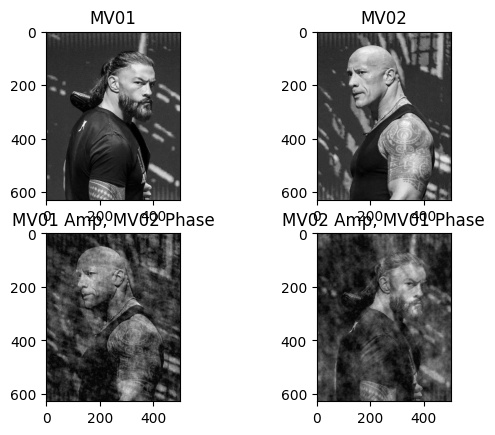

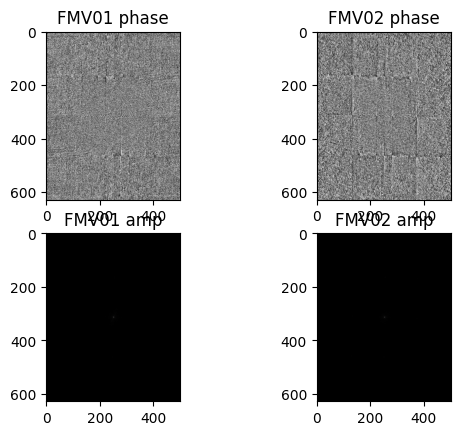

In [14]:
# Display the images
plt.figure()
plt.subplot(2,2,1)
plt.imshow(MV01, cmap='gray')
plt.title('MV01')

plt.subplot(2,2,2)
plt.imshow(MV02, cmap='gray')
plt.title('MV02')

plt.subplot(2,2,3)
plt.imshow(FMV01_exp_FMV02_pic, cmap='gray')
plt.title('MV01 Amp, MV02 Phase')

plt.subplot(2,2,4)
plt.imshow(FMV02_exp_FMV01_pic, cmap='gray')
plt.title('MV02 Amp, MV01 Phase')

plt.figure()
plt.subplot(2,2,1)
plt.imshow(FMV01_phase, cmap='gray')
plt.title('FMV01 phase')

plt.subplot(2,2,2)
plt.imshow(FMV02_phase, cmap='gray')
plt.title('FMV02 phase')

plt.subplot(2,2,3)
plt.imshow(FMV01_amp, cmap='gray')
plt.title('FMV01 amp')

plt.subplot(2,2,4)
plt.imshow(FMV02_amp, cmap='gray')
plt.title('FMV02 amp')

plt.show()
